In [1]:
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from warnings import filterwarnings
filterwarnings("ignore")

C:\Users\HomePC\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("../Employee_Attrition/HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Check the shape
df.shape

(1470, 35)

In [4]:
# Check for irregularities
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Chech for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Numerical statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Categorical statistics
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [9]:
# Checking the datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
# Check for unique values
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Attrition: ['Yes' 'No']
Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department: ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender: ['Female' 'Male']
Unique values in JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus: ['Single' 'Married' 'Divorced']
Unique values in Over18: ['Y']
Unique values in OverTime: ['Yes' 'No']


## Exploratory Data Analysis

In [11]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Male      882
Female    588
Name: count, dtype: int64


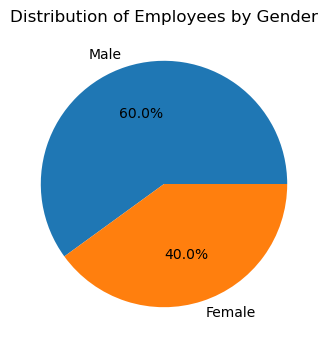

In [12]:
# Visualize `Gender`
plt.figure(figsize=(8, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Employees by Gender")
plt.show();

In [13]:
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


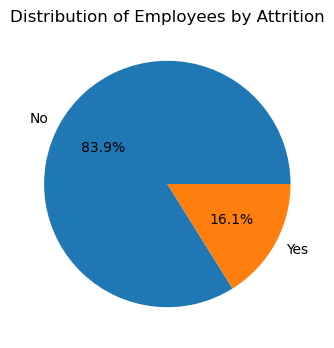

In [14]:
# Visualize `Attrition`
plt.figure(figsize=(8, 4))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Employees by Attrition")
plt.show();

In [15]:
bt_counts = df['BusinessTravel'].value_counts()
print(bt_counts)

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


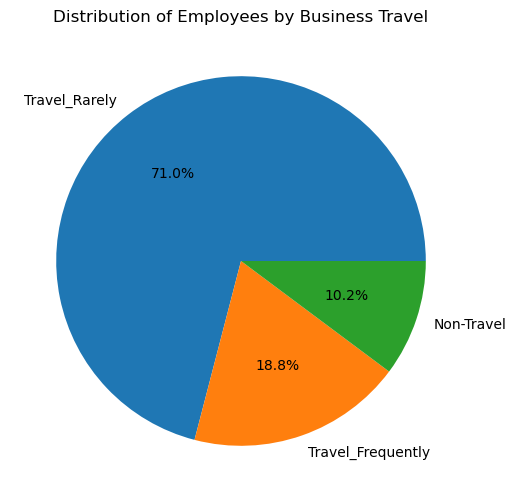

In [16]:
# Visualize `BusinessTravel`
plt.figure(figsize=(12, 6))
plt.pie(bt_counts, labels=bt_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Employees by Business Travel")
plt.show();


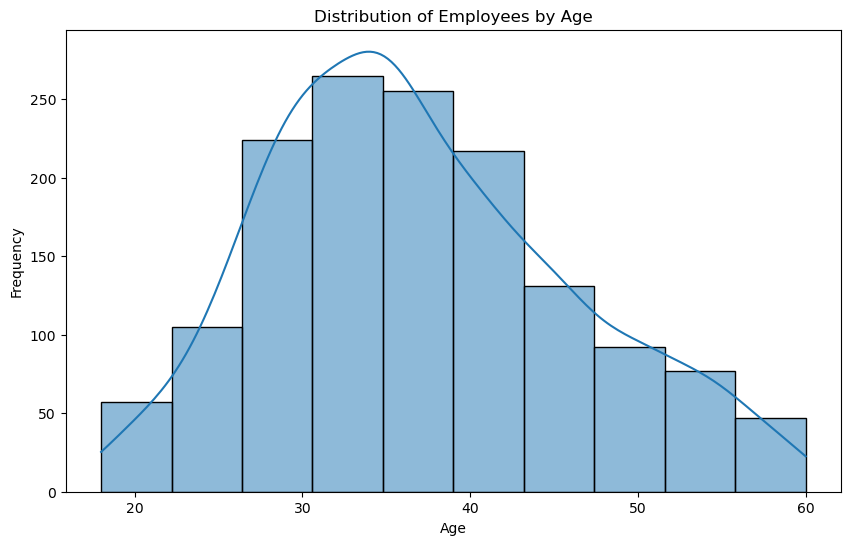

In [17]:
# Visualize `Age`
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", bins=10, kde=True)
plt.title('Distribution of Employees by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid=False
plt.show();

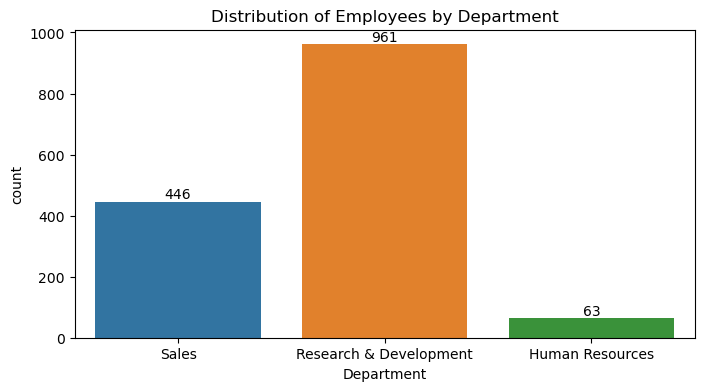

In [18]:
# Visualize Department
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Department')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Department')
plt.show();

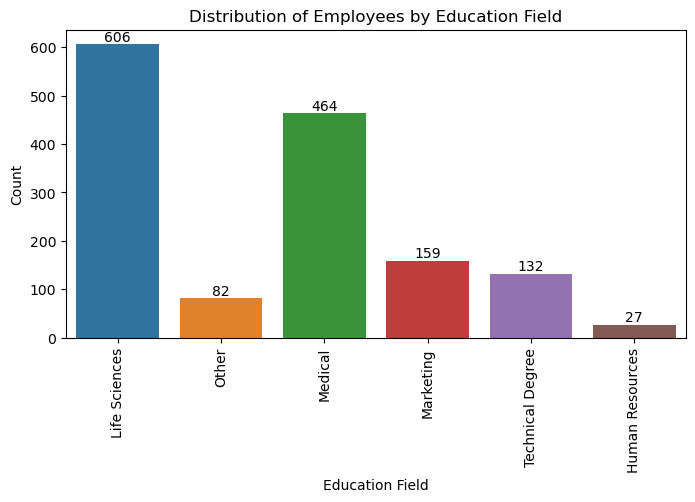

In [19]:
# Visualize `EducationField`
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='EducationField')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Distribution of Employees by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.show();

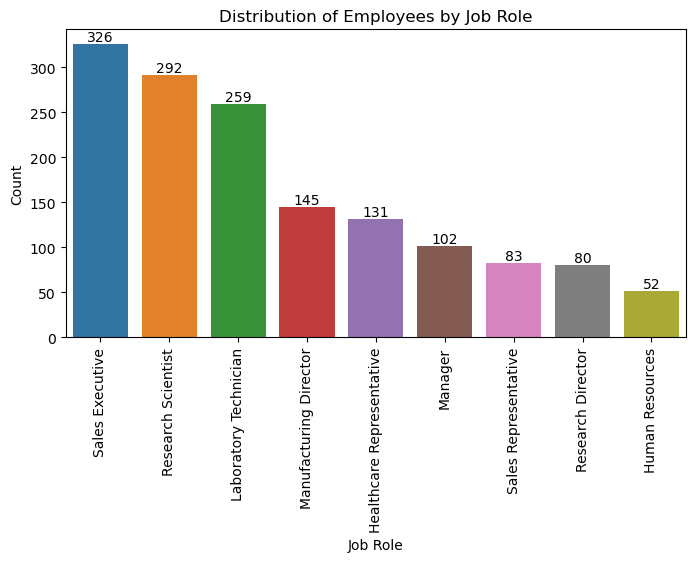

In [20]:
# Visualize `JobRole`
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='JobRole')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Distribution of Employees by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show();

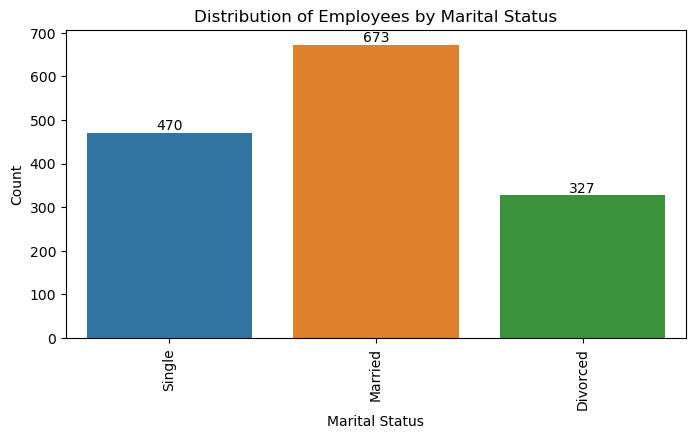

In [21]:
# Visualize `MaritalStatus`
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='MaritalStatus')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Distribution of Employees by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show();

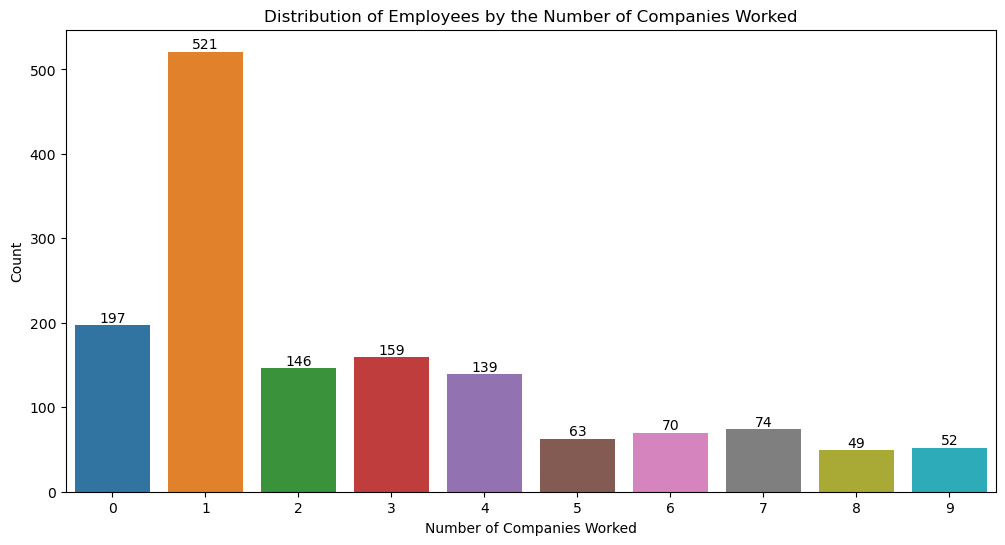

In [22]:
ncw_group = df.groupby('NumCompaniesWorked').size()

# Visualize
plt.figure(figsize=(12,6))
ax = sns.countplot(x='NumCompaniesWorked', data=df)
ax.bar_label(ax.containers[0])
# ncw_group.plot(kind='bar')
plt.title('Distribution of Employees by the Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.show();

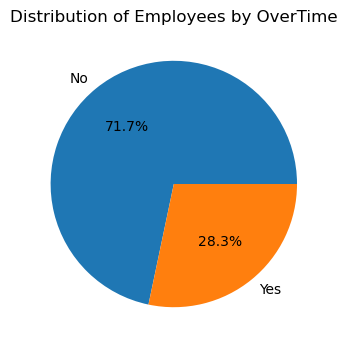

In [23]:
# ot_group = df.groupby('OverTime').value_counts()
# print(ot_group)
ot_group = df['OverTime'].value_counts()

# Visualize `OverTime`
plt.figure(figsize=(8, 4))
plt.pie(ot_group, labels=ot_group.index, autopct='%1.1f%%')
plt.title("Distribution of Employees by OverTime")
plt.show();

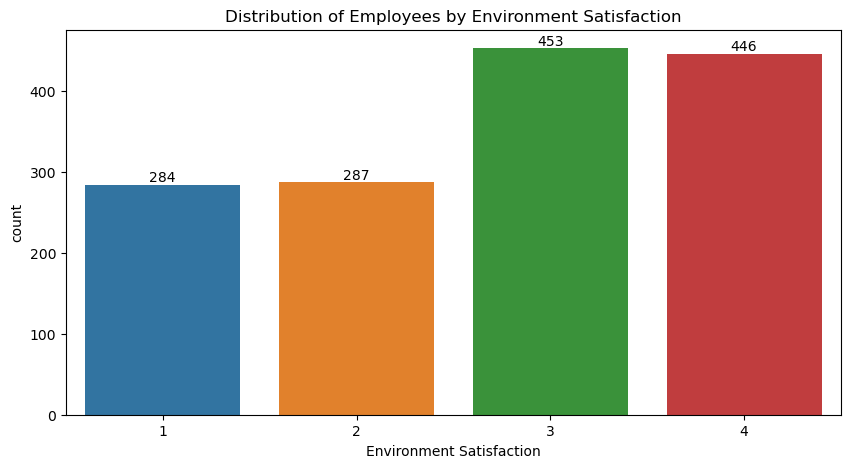

In [24]:
env_sat = df['EnvironmentSatisfaction'].value_counts()

# Visualize `EnvironmentSatisfaction`
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='EnvironmentSatisfaction')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.show();

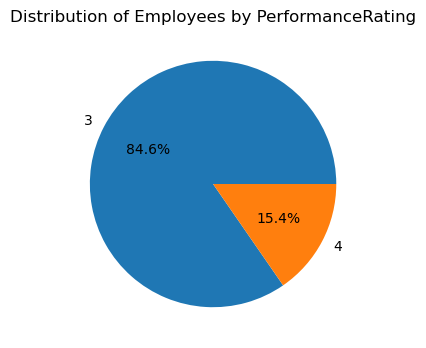

In [25]:
pr_group = df['PerformanceRating'].value_counts()
# print(pr_group)

# Visualize `PerformanceRating`
plt.figure(figsize=(8, 4))
plt.pie(pr_group, labels=pr_group.index, autopct='%1.1f%%')
plt.title("Distribution of Employees by PerformanceRating")
plt.show();

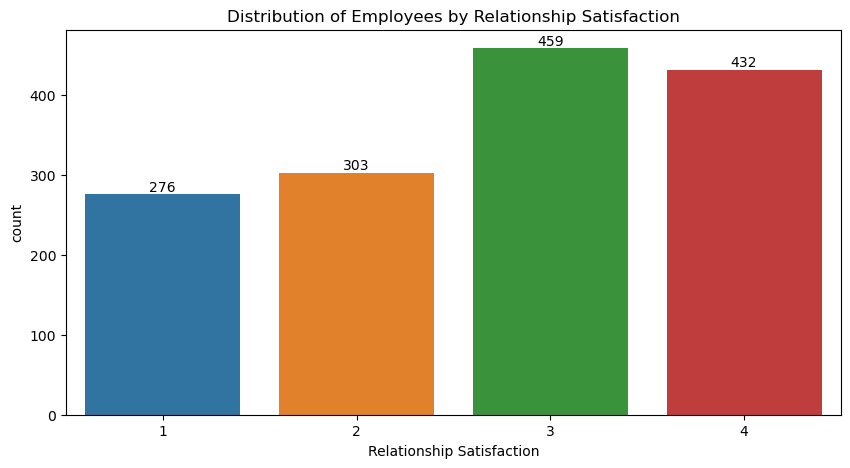

In [26]:
# rel_sat_group = df['RelationshipSatisfaction'].value_counts()
# print(rel_sat_group)

# Visualize `RelationshipSatisfaction`
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='RelationshipSatisfaction')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Relationship Satisfaction')
plt.xlabel('Relationship Satisfaction')
plt.show();

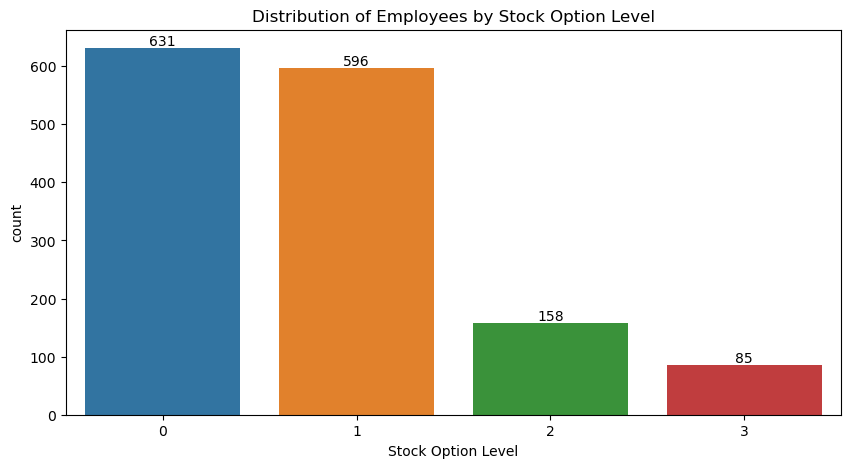

In [27]:
# df['StockOptionLevel'].value_counts()

# Visualize `StockOptionLevel`
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='StockOptionLevel')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Stock Option Level')
plt.xlabel('Stock Option Level')
plt.show();

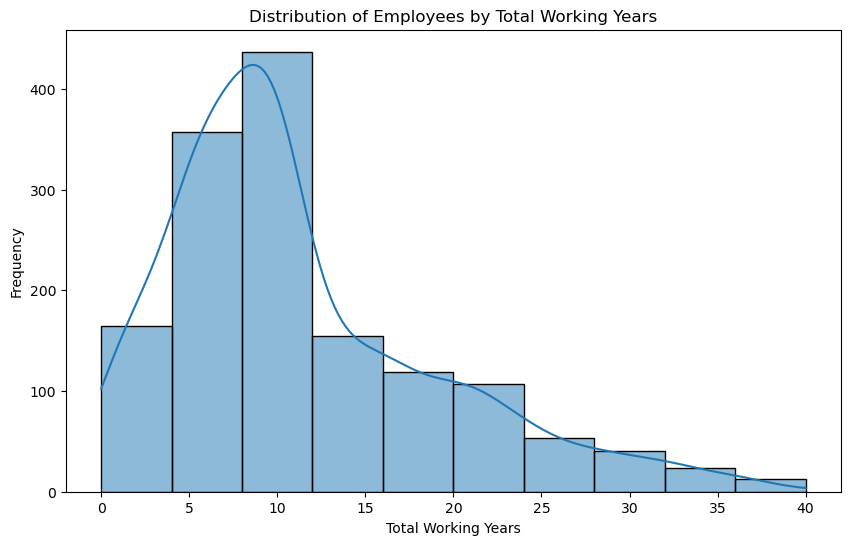

In [28]:
# df['TotalWorkingYears'].unique()

# Visualize `TotalWorkingYears`
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="TotalWorkingYears", bins=10, kde=True)
plt.title('Distribution of Employees by Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Frequency')
plt.grid=False
plt.show();

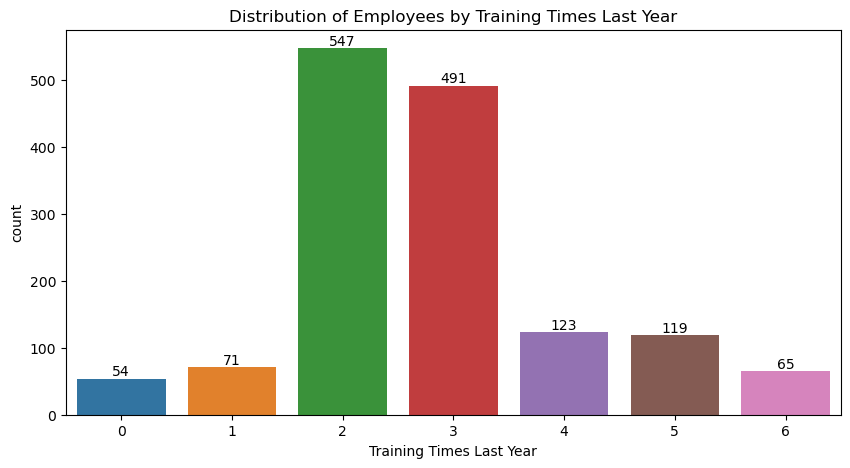

In [29]:
# training_times_group = df['TrainingTimesLastYear'].value_counts()

# Visualize `TrainingTimesLastYear`
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='TrainingTimesLastYear')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Training Times Last Year')
plt.xlabel('Training Times Last Year')
plt.show();

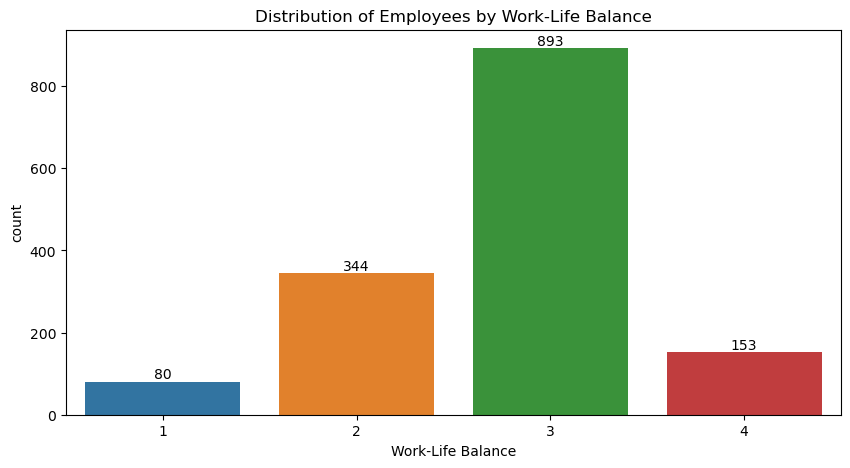

In [30]:
# df['WorkLifeBalance'].value_counts()
# Visualize `TrainingTimesLastYear`
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='WorkLifeBalance')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.show();

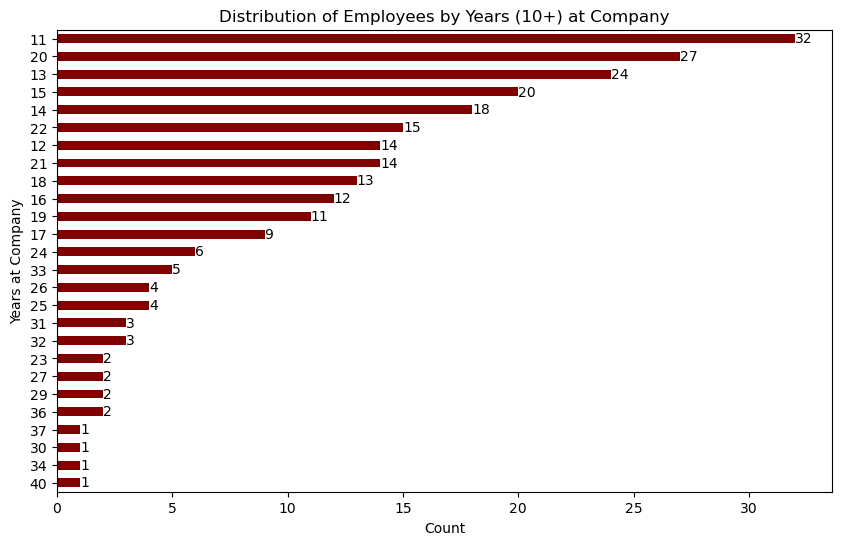

In [31]:
yac_group = df.groupby('YearsAtCompany').size()
# print(yac_group)
yac_group_filtered = yac_group[yac_group.index > 10]
yac_group_filtered_sorted = yac_group_filtered.sort_values(ascending=True)
# Visualize `YearsAtCompany`
plt.figure(figsize=(10, 6))
ax = yac_group_filtered_sorted.plot(kind='barh', color='maroon', width=0.5)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Years (10+) at Company')
plt.xlabel('Count')
plt.ylabel('Years at Company')
plt.show();

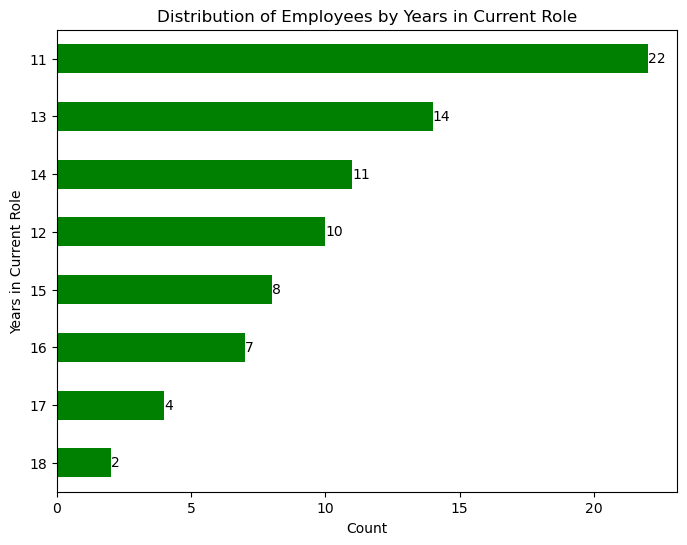

In [32]:
yicr_group = df.groupby('YearsInCurrentRole').size()
yicr_group_filtered = yicr_group[yicr_group.index > 10]
yicr_group_filtered_sorted = yicr_group_filtered.sort_values(ascending=True)
# Visualize `YearsInCurrentRole`
plt.figure(figsize=(8, 6))
ax = yicr_group_filtered_sorted.plot(kind='barh', color='green')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Years in Current Role')
plt.xlabel('Count')
plt.ylabel('Years in Current Role')
plt.show();

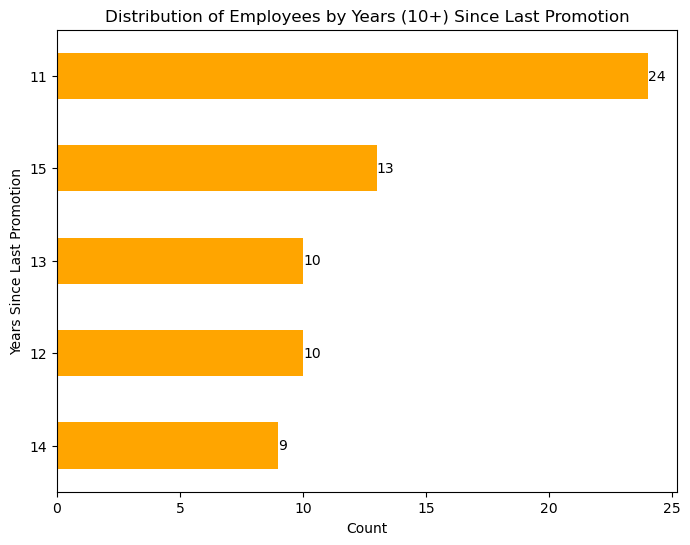

In [33]:
yslp_group = df.groupby('YearsSinceLastPromotion').size()
yslp_group_filtered = yslp_group[yslp_group.index > 10]
yslp_group_filtered_sorted = yslp_group_filtered.sort_values(ascending=True)
# Visualize `YearsSinceLastPromotion`
plt.figure(figsize=(8, 6))
ax = yslp_group_filtered_sorted.plot(kind='barh', color='orange')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Years (10+) Since Last Promotion')
plt.xlabel('Count')
plt.ylabel('Years Since Last Promotion')
plt.show();

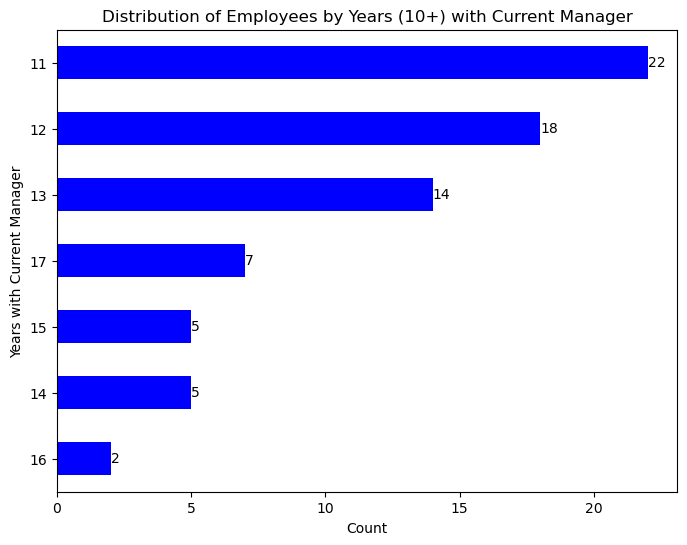

In [34]:
ywcm_group = df.groupby('YearsWithCurrManager').size()
ywcm_group_filtered = ywcm_group[ywcm_group.index > 10]
ywcm_group_filtered_sorted = ywcm_group_filtered.sort_values(ascending=True)
# Visualize `YearsWithCurrManager`
plt.figure(figsize=(8, 6))
ax = ywcm_group_filtered_sorted.plot(kind='barh', color='blue')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employees by Years (10+) with Current Manager')
plt.xlabel('Count')
plt.ylabel('Years with Current Manager')
plt.show();

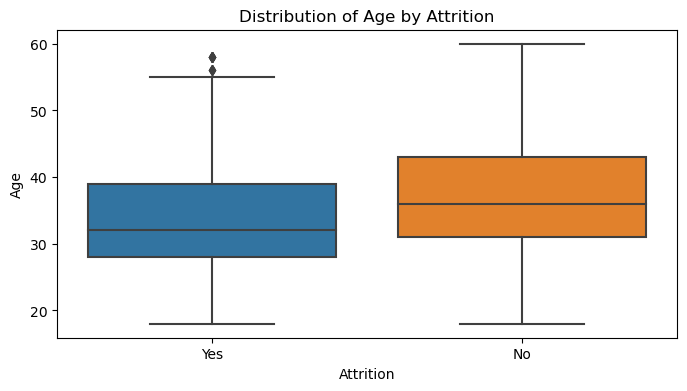

In [35]:
# Visualize `Age` by `Attrition`
plt.figure(figsize=(8, 4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show();

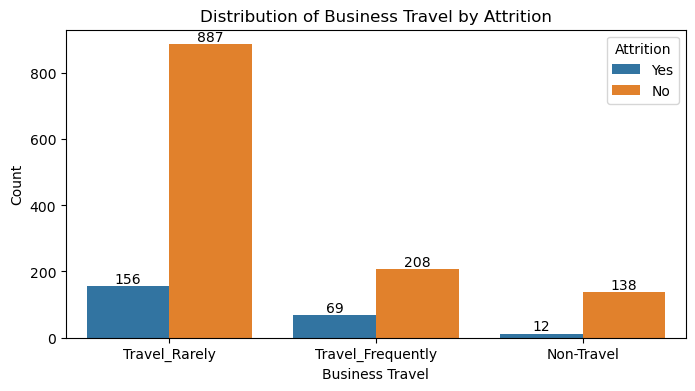

In [36]:
# Visualize `BusinessTravel` by `Attrition`
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Business Travel by Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show();

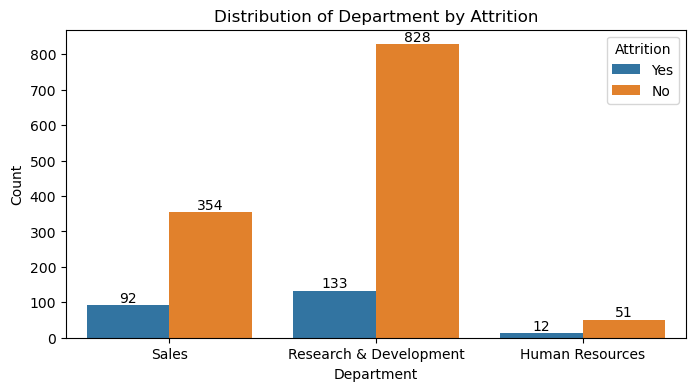

In [37]:
# Visualize `Department` by `Attrition`
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Department', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Department by Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show();

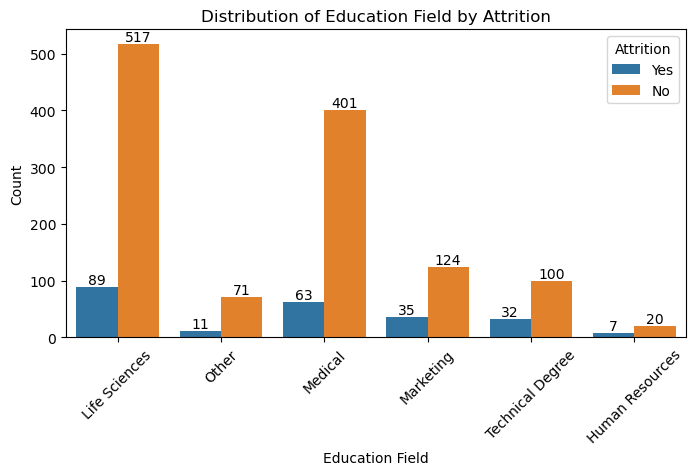

In [38]:
# Visualize `EducationField` by `Attrition`
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='EducationField', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Distribution of Education Field by Attrition')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.show();

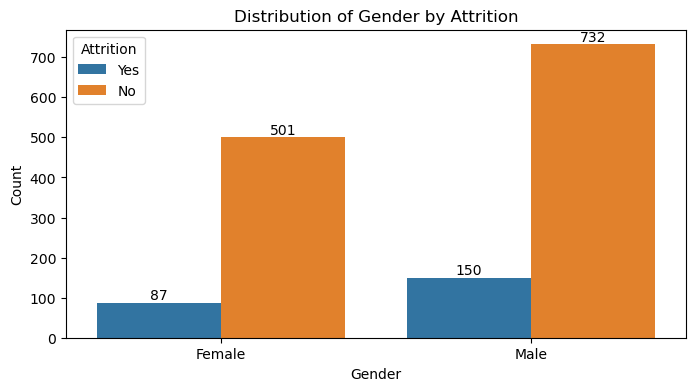

In [39]:
# Visualize `Gender` by `Attrition`
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Gender', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Gender by Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

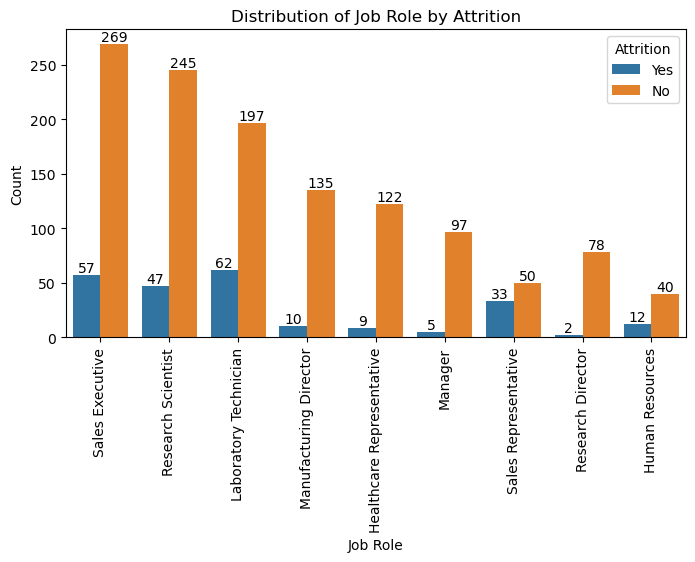

In [40]:
# Visualize `JobRole` by `Attrition`
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='JobRole', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.title('Distribution of Job Role by Attrition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show();

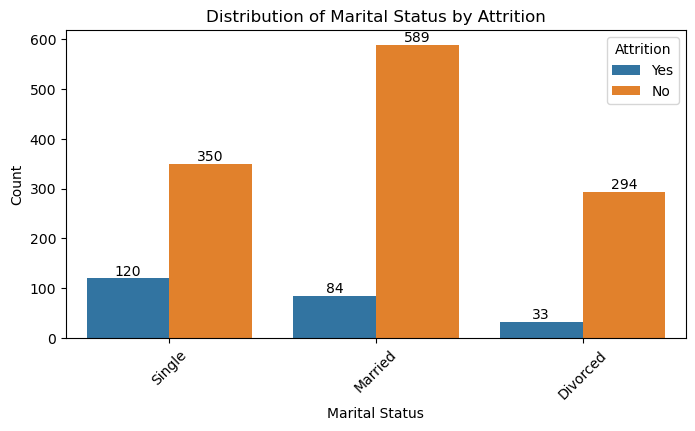

In [41]:
# Visualize `MaritalStatus` by `Attrition`
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Distribution of Marital Status by Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show();

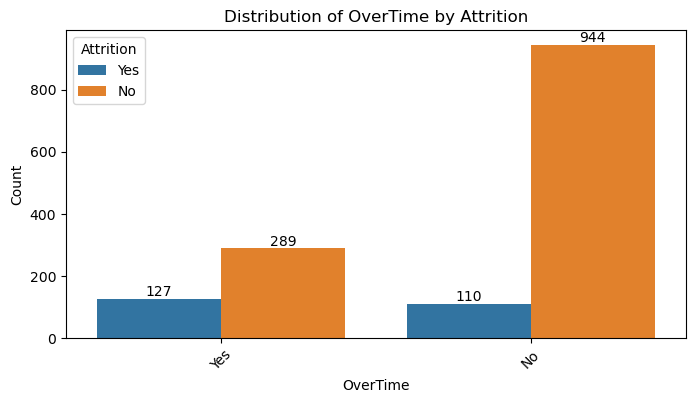

In [42]:
# Visualize `OverTime` by `Attrition`
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='OverTime', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Distribution of OverTime by Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show();

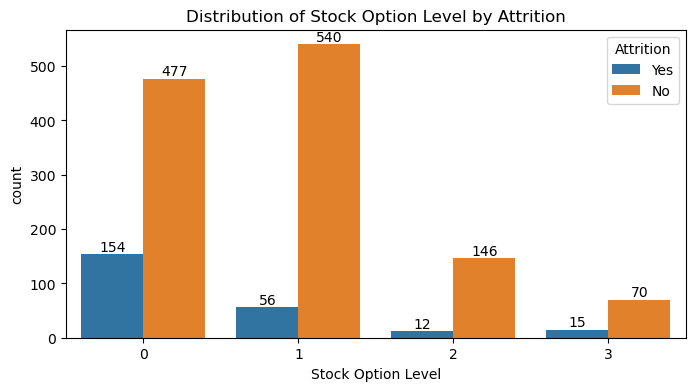

In [43]:
# Visualize `StockOptionLevel` by `Attrition`
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='StockOptionLevel', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Stock Option Level by Attrition')
plt.xlabel('Stock Option Level')
plt.show();

In [44]:
## Attrition Rates
att_rates = df.groupby(['Department','JobRole'])['Attrition'].value_counts()
print(att_rates)

Department              JobRole                    Attrition
Human Resources         Human Resources            No            40
                                                   Yes           12
                        Manager                    No            11
Research & Development  Healthcare Representative  No           122
                                                   Yes            9
                        Laboratory Technician      No           197
                                                   Yes           62
                        Manager                    No            51
                                                   Yes            3
                        Manufacturing Director     No           135
                                                   Yes           10
                        Research Director          No            78
                                                   Yes            2
                        Research Scientist         No  

In [45]:
overtime_rates = df.groupby(['OverTime'])['Attrition'].value_counts()
print(overtime_rates)

OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
Name: count, dtype: int64


## Encode Categorical Features
- This involves converting catgorical values to numeric values.

In [46]:
# Check unique columns for each `categorical` column
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [47]:
# Encode each `categorical` column
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 3})
df['Department'] = df['Department'].map({'Sales': 1, 'Research & Development': 2, 'Human Resources': 3})
df['EducationField'] = df['EducationField'].map({'Life Sciences': 1, 'Other': 2, 'Medical': 3, 'Marketing': 4, 'Technical Degree': 5, 'Human Resources': 6})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})
df['JobRole'] = df['JobRole'].map({'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician': 3, 'Manufacturing Director': 4, 'Healthcare Representative': 5, 'Manager': 6, 'Sales Representative': 7, 'Research Director': 8, 'Human Resources': 9})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 1, 'Married': 2, 'Divorced': 3})
df['Over18'] = df['Over18'].map({'Y': 1, 'N': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 2})

In [48]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


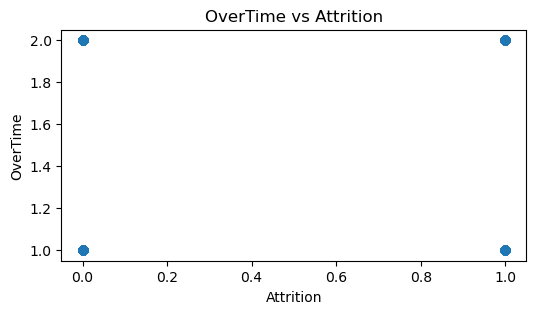

In [54]:
# df['OverTime'].corr(df['Attrition'])
plt.figure(figsize=(6, 3))
plt.scatter(x='Attrition', y='OverTime', data=df)
plt.title('OverTime vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('OverTime')
plt.show();

In [50]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [51]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')